## Neural Networks - selection & evaluation

In [9]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

#### Load Data

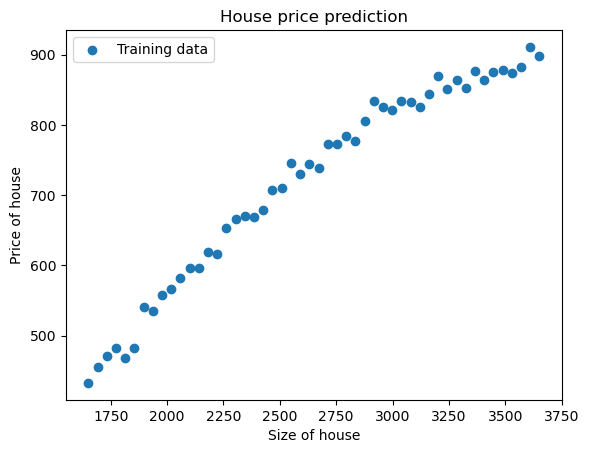

In [10]:
data = np.loadtxt('/Users/sshailesh/Documents/GitHub/MachineLearningBasics/ApplyingML-M2-W3/data_w3_ex1.csv', delimiter=',')
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("Size of house")
ax.set_ylabel("Price of house")
ax.legend(["Training data"])
ax.set_title("House price prediction")
plt.show()

#### Split dataset into train, cv & test 

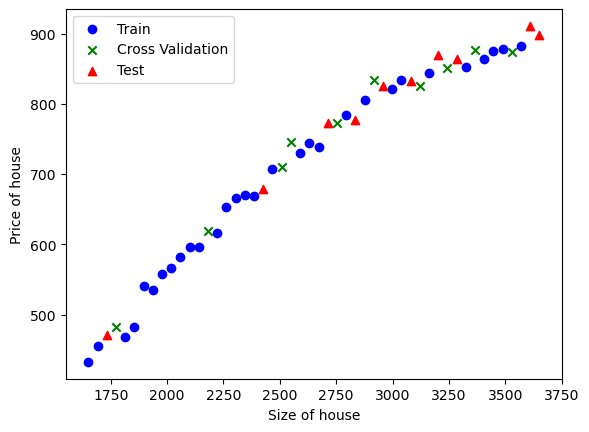

In [11]:
X_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.4, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_validate, y_validate, test_size=0.5, random_state=1)

def plot_data_sets(x_train, y_train, x_cv, y_cv, x_test):
    fig, ax = plt.subplots()
    ax.scatter(x_train, y_train, color='blue', label='Train')
    ax.scatter(x_cv, y_cv, color='green', marker='x', label='Cross Validation')
    ax.scatter(x_test, y_test, color='red', marker='^', label='Test')
    ax.set_xlabel("Size of house")
    ax.set_ylabel("Price of house")
    ax.legend()

plot_data_sets(X_train, y_train, x_cv, y_cv, x_test)


#### Normalize data

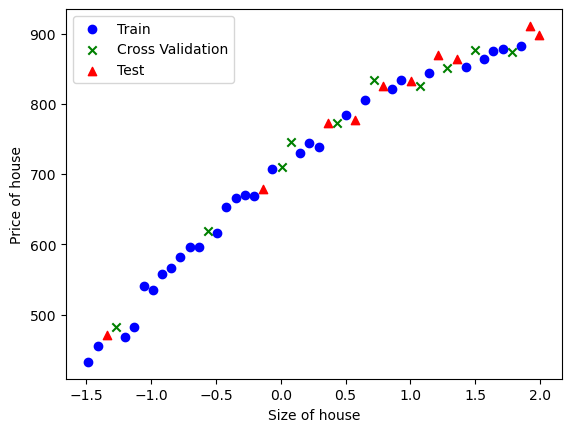

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)

plot_data_sets(X_train_scaled, y_train, x_cv_scaled, y_cv, x_test_scaled)

In [13]:
def get_models():
    tf.random.set_seed(20)

    models = []
    model1 = Sequential(
        layers=[
            Dense(25, activation='relu'),
            Dense(25, activation='relu'),
            Dense(1, activation='linear')
        ],
        name = 'Model1'
    )
    model2 = Sequential(
        layers=[
            Dense(20, activation='relu'),
            Dense(12, activation='relu'),
            Dense(12, activation='relu'),

            Dense(1, activation='linear')
        ],
        name = 'Model2'
    )
    model3 = Sequential(
        layers=[
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(4, activation='relu'),
            Dense(12, activation='relu'),
            Dense(1, activation='linear')
        ],
        name = 'Model3'
    )
    models.append(model1)
    models.append(model2)
    models.append(model3)
    return models

nn_models = get_models()
train_mse = []
cv_mse = []
test_mse = []

for model in nn_models:
    model.compile(
        optimizer=Adam(learning_rate=0.01),
        loss='mean_squared_error'
    )

    model.fit(
        X_train_scaled,
        y_train,
        epochs=100
    )

    y_train_pred = model.predict(X_train_scaled)
    y_cv_pred = model.predict(x_cv_scaled)
    y_test_pred = model.predict(x_test_scaled)

    train_mse.append(root_mean_squared_error(y_train, y_train_pred))
    cv_mse.append(root_mean_squared_error(y_cv, y_cv_pred)) 
    test_mse.append(root_mean_squared_error(y_test, y_test_pred))

for i in range(len(nn_models)):
    print(f"Model {i+1}: Train MSE: {train_mse[i]}, CV MSE: {cv_mse[i]}, Test MSE: {test_mse[i]}")
    

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - loss: 484204.4062
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 483975.5312
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 483753.9062
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 483556.2188
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 483373.5312
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 483180.0938
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 482961.0938
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 482716.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 482433.9375
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 482118.5938
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 481765.3750
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 481367.7812
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 480919.6250
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 480418.8438
Epoch 15/100
1/1 ━━━━━━━━

## Classification

#### Load Data

shape of X: (200, 2)
shape of y: (200, 1)


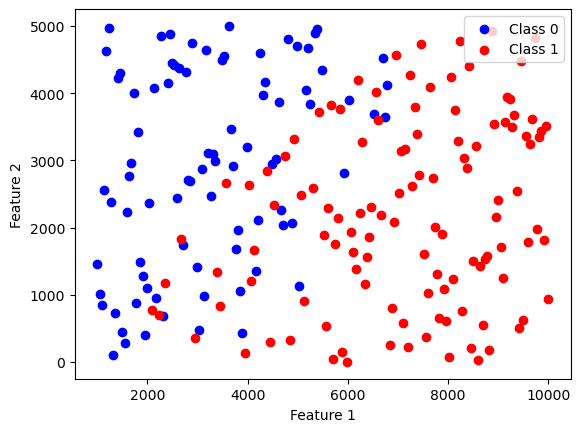

In [14]:
data = np.loadtxt('/Users/sshailesh/Documents/GitHub/MachineLearningBasics/ApplyingML-M2-W3/data_w3_ex2.csv', delimiter=',')
# Take all rows and all columns except the last one. Below row can we rewritten as data[:, :2]
X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)
print(f"shape of X: {X.shape}") 
print(f"shape of y: {y.shape}")

def plot_data(X, y):
    X_with_class_0 = X[y[:, 0] == 0]
    X_with_class_1 = X[y[:, 0] == 1]
    fig, ax = plt.subplots()
    ax.scatter(X_with_class_0[:, 0], X_with_class_0[:, 1], color='blue', label='Class 0')
    ax.scatter(X_with_class_1[:, 0], X_with_class_1[:, 1], color='red', label='Class 1')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

plot_data(X, y)



#### Split data into train, cross validation and test data sets and normalize

In [18]:
X_train, x_validate, y_train, y_validate = train_test_split(X, y, test_size=0.4, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_validate, y_validate, test_size=0.5, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)

print(f"shape of X_train_scaled: {X_train_scaled.shape}")

shape of X_train_scaled: (120, 2)


#### Evaluate between models based on how well they classified 

In [25]:
# Models after hyperparameter tuning
tuned_models = []

# Initialize predictions for train and cross validation for each of 3 models defined above.
train_predictions = []
cv_predictions = []

# Initialize errors for train and cross validation for each of 3 models defined above. 
train_errors = []
cv_errors = []

nn_models = get_models()

for model in nn_models:
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=Adam(learning_rate=0.01),
    )

    print(f"shape of X_train_scaled: {X_train_scaled.shape}")

    model.fit(
        X_train_scaled,
        y_train,
        epochs=200
    )

    tuned_models.append(model)

    threshold = 0.5

    # Record the fraction of misclassified examples for the training set
    y_train_pred = model.predict(X_train_scaled)
    y_train_pred = tf.math.sigmoid(y_train_pred)
    y_train_pred = np.where(y_train_pred > threshold, 1, 0)
    train_error = np.mean(y_train_pred != y_train)
    train_errors.append(train_error)

    # Record the fraction of misclassified examples for the cross validation set
    y_cv_pred = model.predict(x_cv_scaled)
    y_cv_pred = tf.math.sigmoid(y_cv_pred)
    y_cv_pred = np.where(y_cv_pred > threshold, 1, 0)
    cv_error = np.mean(y_cv_pred != y_cv)
    cv_errors.append(cv_error)

for i in range(len(nn_models)):
    print(f"Model {i+1}: Train error: {train_errors[i]}, CV error: {cv_errors[i]}")



shape of X_train_scaled: (120, 2)
Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.70995
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.5905
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.5031
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4147  
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.3397
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.3016
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2928  
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.2886
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.2843
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2788  
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.2736
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.2699
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.2675
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.2663
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 

#### Plot the predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step


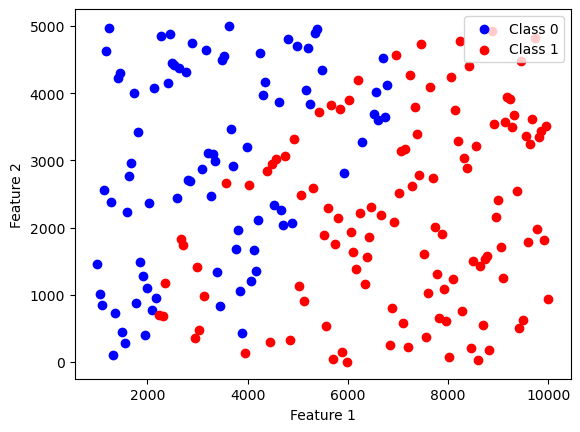

In [36]:
X_scaled = scaler.transform(X)
# Try with all three tuned models. Change the index from 0 to 1 and 2 to test how other two models performed. . 
y_hat = tuned_models[0].predict(X_scaled)
y_hat = tf.math.sigmoid(y_hat)
y_hat = np.where(y_hat > 0.5, 1, 0)

plot_data(X, y_hat)
